# Numerical Computation

In this lesson I'll discuss the basics of numerical computation, specifically what integers and floating point numbers are and how they're represented on a computer. This may seem too basic to mention, but it's actually very important. There's a lot of subtlety involved. Let's get started.

In [1]:
import numpy as np
from utils.math_ml import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Integers

### Basics

Recall the **integers** are whole numbers that can be positive, negative, or zero. Examples are 5, 100151, 0, -72, etc. The set of all integers is commonly denoted by the symbol $\mathbb{Z}$.

In python, integers (ints for short) are builtin objects of type `int` that more or less follow the rules that integers in math follow.

Among other things, the following operations can be performed with integers:
- Addition: $2 + 2 = 4$.
- Subtraction: $2 - 5 = -3$.
- Multiplication: $3 \times 3 = 9$ (in python this is the `*` operator, e.g. `3 * 3 = 9`)
- Exponentiation: $2^3 = 2 \times 2 \times 2 = 8$ (in python this is the `**` operator, e.g. `2 ** 3 = 8`).
- Remainder (or Modulo): the remainder of 10 when divided by 3 is 1, written $10 \text{ mod } 3 = 1$ (in python this is the `%` operator, e.g. `10 % 3 = 1`).

If any of these operations are applied to two integers, the output will itself always be an integer.

Here are a few examples.

In [3]:
2 + 2
2 - 5
3 * 3
10 % 3
2 ** 3

4

-3

9

1

8

What about division? You can't always divide two integers and get another integer. What you have to do instead is called integer division. Here you divide the two numbers and then round the answer down to the nearest whole number. Since $5 \div 2 = 2.5$, the nearest rounded down integer is 2. 

In math, this "nearest rounded down integer" 2 is usually called the **floor** of 2.5, and represented with the funny symbol $\lfloor 2.5 \rfloor.$ Using this notation we can write the above integer division as 
$$\big\lfloor \frac{5}{2} \big\rfloor = 2.$$

In python, integer division is done using the `//` operator, e.g. `5 // 2 = 2`. I'll usually write $5 \ // \ 2$ instead of $\big\lfloor \frac{5}{2} \big\rfloor$ when it makes sense,
$$5 \ // \ 2 = \big\lfloor \frac{5}{2} \big\rfloor = 2.$$

In [4]:
5 // 2

2

We can also do regular division `/` with ints, but the output will *not* be an integer even if the answer should be, e.g. `4 / 2`. Only integer division is guaranteed to return an integer. I'll get to this shortly.

In [5]:
4 / 2
type(4 / 2)

2.0

float

In [6]:
4 // 2
type (4 // 2)

2

int

Division by zero is of course undefined for both division and integer division. In python it will always raise a `ZeroDivisionError` like so.

In [7]:
4 / 0

ZeroDivisionError: division by zero

In [8]:
4 // 0

ZeroDivisionError: integer division or modulo by zero

### Representing Integers

Just like every other data type, on a computer integers are actually represented internally as a sequence of bits.
A **bit** is a "binary digit", 0 or 1. A sequence of bits is just a sequence of zeros and ones, e.g. 0011001010 or 1001001.

The number of bits used to represent a piece of data is called its **word size**. If we use a word size of $n$ bits to represent an integer, then there are $2^n$ possible integer values we can represent.

If integers could only be positive or zero, representing them with bits would be easy. We could just convert them to binary and that's it. To convert a non-negative integer to binary, we just need to keep dividing it by 2 and recording its remainder (0 or 1) at each step. The binary form is then just the sequence of remainders, written right to left. More generally, the binary sequence of some arbitrary number $x$ is the sequence of coefficients $b_k=0,1$ in the sum 

$$x = \sum_{k=-\infty}^\infty b_k 2^k = \cdots + b_2 2^2 + b_1 2^1 + b_0 2^0 + b_{-1} 2^{-1} + b_{-2} 2^{-2} + \cdots.$$

Here's an example. Suppose we wanted to represent the number $12$ in binary.
1. $12 \ // \ 2 = 6$ with a remainder of $0 = 12 \text{ mod } 2$, so the first bit from the right is then $0$.
2. $6 \ // \ 2 = 3$ with a remainder of $0 = 6 \text{ mod } 2$, so the next bit is $0$.
3. $3 \ // \ 2 = 1$ with a remainder of $1 = 3 \text{ mod } 2$, so the next bit is $1$.
4. $1 \ // \ 2 = 0$ with a remainder of $1 = 1 \text{ mod } 2$, so the next bit is $1$.

So the binary representation of $12$ is $1100$, which is the sequence of coefficients in the sum

$$12 = 1 \cdot 2^{3} + 1 \cdot 2^{2} + 0 \cdot 2^{1} + 0 \cdot 2^{0}.$$

Rather than keep doing these by hand, you can quickly convert a number to binary in python by using `bin`. It'll return a string representing the binary sequence of that number, prepended with the special prefix `0b`. To get back to the integer from, use `int`, passing in a base of `2`.

In [9]:
bin(12)

'0b1100'

In [10]:
int('0b110', 2)

6

This representation works fine for non-negative integers, also called the **unsigned integers** in computer science. To represent an unsigned integer with $n$ bits, just get its binary form and prepend it with enough zeros on the left until all $n$ bits are used. For example, if we used 8-bit unsigned integers then $n=8$, hence representing the number $12$ would look like $00000110$. Simple, right?

Unsigned ints work fine if we never have to worry about negative numbers. But in general we do. These are called the **signed integers** in computer science. To represent signed ints, we need to use one of the bits to represent the sign. What we can do is reserve the left-most bit for the sign, $0$ if the integers is positive or zero, $1$ if the integer is negative.

For example, if we used 8-bit *signed* integers to represent $12$, we'd again write $00000110$, exactly as before. But this time it's understood that left-most $0$ is encoding the fact that $12$ is positive. If instead we wanted to represent the number $-12$ we'd need to flip that bit to a $1$, so we'd get $10000110$.

Let's now do an example of a simple integer system. Consider the system of 4-bit signed ints. In this simple system, $n=4$ is the word size, and an integer $x$ is represented with the sequence of bits

$$x \equiv sb_1b_2b_3,$$ 

where $s$ is the sign bit and $b_1b_2b_3$ are the remaining 3 bits allowed to represent the numerical digits. This system can represent $2^4=16$ possible values in the range $[-2^3+1,2^3-1] = [-8,7]$, given in the following table:

| Integer | Representation | Integer | Representation |
|---------|----------------|---------|----------------|
| -0      | 1000           | +0      | 0000           |
| -1      | 1001           | 1       | 0001           |
| -2      | 1010           | 2       | 0010           |
| -3      | 1011           | 3       | 0011           |
| -4      | 1100           | 4       | 0100           |
| -5      | 1101           | 5       | 0101           |
| -6      | 1110           | 6       | 0110           |
| -7      | 1111           | 7       | 0111           |

Note the presence of $-0 \equiv 1110$ in the upper left. This is because the system as I've defined it leaves open the possibility of two zeros, $+0$ and $-0$, since for zero the sign bit is redundant. A way to get around this is to encode the negative numbers slightly differently, by not just setting the sign bit to one, but also inverting the remaining bits and subtracting one from them. This is called the **two's complement representation**. It's how most languages, including python, actually represent integers. I won't go into this representation in any depth, except to say that it gets rid of the need for $-0$ and replaces it with $-2^{n-1}$.

Here's what that table looks like for 4-bit integers. It's almost the same, except there's no $-0$, instead a $-8$. Notice the positive integers look exactly the same. It's only the negative integers that look different. For them, the right three bits get inverted and added with a one.

| Integer | Two's Complement | Integer | Two's Complement |
|---------|----------------|---------|----------------|
| -1      | 1111           | 0       | 0000           |
| -2      | 1110           | 1       | 0001           |
| -3      | 1101           | 2       | 0010           |
| -4      | 1100           | 3       | 0011           |
| -5      | 1011           | 4       | 0100           |
| -6      | 1010           | 5       | 0101           |
| -7      | 1001           | 6       | 0110           |
| -8      | 1000           | 7       | 0111           |

It's worth visualizing what integers look like on the number line, if for nothing else than to compare it with what floats look like later on. Below I'll plot what a 6-bit signed integer system would look like. Such a system should go from -32 to 31. I'll to use the helper function `plot_number_dist` to do the plotting. As you'd expect, you just see a bunch of equally spaced points from -32 to 31.

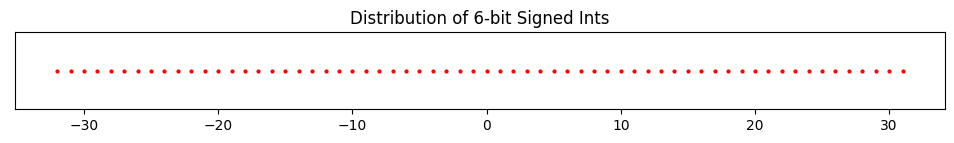

In [11]:
n = 6
six_bit_ints = range(-2**(n-1), 2**(n-1))
plot_number_dist(six_bit_ints, title=f'Distribution of {n}-bit Signed Ints')

In python, integers are represented by default using a much bigger word size of $n=64$ bits, called **long** integers, or **int64** for short. This means (using two's complement) we can represent $2^{64}=18446744073709551616$ possible integer values in the range $[-2^{63}, 2^{63}-1]$.

You can see from this that 64-bit integers have a minimum integer allowed and a maximum integer allowed, which are

$$\text{min_int}=-2^{63}=-9223372036854775808, \qquad \text{max_int}=2^{63}-1=9223372036854775807.$$

What I've said is technically only exactly true in older versions of pythons as well as other programming languages like C. It turns out newer versions of python have a few added tricks that allow you to represent essentially arbitrarily large integers. You can see this by comparing it to numpy's internal int64 representation, which uses the C version. A numpy int64 outside the valid range will throw an overflow error.

In [12]:
min_int = -2 ** 63
max_int = 2 ** 63 - 1

In [13]:
min_int - 1
np.int64(min_int - 1)

-9223372036854775809

OverflowError: Python int too large to convert to C long

In [14]:
max_int + 1
np.int64(max_int + 1)

9223372036854775808

OverflowError: Python int too large to convert to C long

## Floats

### Basics

What if we want to represent decimal numbers or fractions instead of whole numbers, like $1.2$ or $0.99999$, or even irrational numbers like $\pi=3.1415926\dots$? To do this we need a new system of numbers that I'll call floating point numbers, or **floats**, for reasons I'll explain soon. Floats will be a computer's best attempt to represent the real numbers $\mathbb{R}$. They'll represent real numbers only approximately with some specified precision.

In python, floats are builtin objects of type `float`. Floats obey pretty much the same operations that integers do with some minor exceptions:
- Addition: $1.2 + 4.3 = 5.5$.
- Subtraction: $1.2 - 4.3 = -3.1$.
- Multiplication: $1.2 \times 4.3 = 5.16$.
- Exponentiation: $4.3^2 = 18.49$.
- Remainder (or Modulo): $4.3 \text{ mod } 1.2 = 0.7$.
- Integer Division: $4.3 \ // \ 1.2 = 3.0$.
- Division: $4.3 \div 1.2$.

I'll print these out in python to verify the answers are correct.

In [15]:
1.2 + 4.3
1.2 - 4.3
1.2 * 4.3
4.3 ** 2
4.3 % 1.2
4.3 // 1.2
4.3 / 1.2

5.5

-3.0999999999999996

5.159999999999999

18.49

0.7

3.0

3.5833333333333335

Most of them look right. But what the heck is going on with $1.2 - 4.3$ and $1.2 \times 4.3$? We're getting some weird trailing nines that shouldn't be there. This gets to how floats are actually represented on a computer.

### Representing Floats

Representing real numbers on a computer is a lot more subtle than representing integers. Since a computer can only have a finite number of bits, they can't represent infinitely many digits, e.g. in irrational numbers like $\pi$. Using finite word sizes will necessarily have to truncate real numbers to some number of decimal places. This truncation will create an error in the calculation called **numerical roundoff**.

So how should we represent a decimal number using $n$ bits? As an example, let's imagine we're trying to represent the number $x=157.208$. Perhaps the first thing you might think of is to use some number of those bits to represent the integer part, and some number to represent the fractional part. Suppose you have $n=16$ bits available to represent $x$. Then maybe you can use 8 bits for the integer part $157$, and 8 bits for the fractional part $0.208$. Converting both halves to binary, you'd get 
$$157 \equiv 10011101, \quad 0.208 \equiv 0011010100111111.$$

Truncating both sequences to 8 bits (from the left), you could thus adopt a convention that $157.208 \equiv 10011101 \ 00110101$.

This system is an example of a **fixed point** representation. This has to do with the fact that we're always using a fixed number of bits for the integer part, and a fixed number for the fractional part. The decimal point isn't allowed to **float**, or move around to allocate more bits to the integer or fractional part depending which needs more precision. The decimal point is **fixed**.

As I've suggested, the fixed point representation seems to be limited and not terribly useful. If you need really high precision in the fractional part, your only option is to use a larger word size. If you're dealing with really big numbers and don't care much about the fractional part, you also need a larger word size so you don't run out of numbers. A solution to this problem is to allow the decimal point to float. We won't allocate a fixed number of bits to represent the integer or fractional parts. We'll design it in such a way that larger numbers give the integer part more bits, and smaller numbers give the fractional part more bits.

The trick to allowing the decimal point to float is to represent not just the digits of a number but also its exponent. Think about scientific notation, where if you have a number like say $x=1015.23$, you can write it as $1.01523 \cdot 10^3$, or `1.01523e3`. That $3$ is the exponent. It says something about how big the number is. What we can do is convert a number to scientific notation. Then use some number of bits to represent the exponent $3$ and some to represent the remaining part $1.01523$. This is essentially the whole idea behind floating point.

In floating point representation, instead of using scientific notation with powers of ten, it's more typical to use powers of two. When using powers of two, the decimal part can always be scaled to be between 1 and 2, so they look like $1.567$ or something like that. Since the $1.$ part is always there, we can agree it's always there, and only worry about representing the fractional part $0.567$. We'll call this term the **mantissa**. Denoting the sign bit as $s$, the exponent as $e$, and the mantissa as $m$, we can thus right any decimal number $x$ in a modified scientific notation of the form
$$x = (-1)^s \cdot (1+m) \cdot 2^{e}.$$
Once we've converted $x$ to this form, all we need to do is to figure out how to represent $s$, $m$, and $e$ using some number of bits of $n$, called the floating point **precision**. Assume the $n$ bits of precision allocate $1$ bit for the sign, $n_e$ bits for the exponent, and $n_m$ bits for the mantissa, so $n=1+n_e+n_m$.

Here are the steps to convert a number $x$ into its $n$-bit floating point representation.
- Given some number $x$, get its modified scientific notation form $x = (-1)^s \cdot (1+m) \cdot 2^e$.
    - Determine the sign of $x$. If negative, set the sign bit to $s=1$, else default to $s=0$. Set $x = |x|$.
    - Keep performing the operation $x = x \ // \ 2$ until $1 \leq x \leq 2$. Keep track of the number of times you're dividing, which is the **exponent** $e$.
    - The remaining part will be some $1 \leq x \leq 2$. Write it in the form $x = 1 + m$, where $m$ is the mantissa.
- Convert the scientific notation form into a sequence of $n$ bits, truncating where necessary.
    - For reasons I'll describe in a second, it's good to add a **bias** term $b$ to the exponent $e$ before converting the exponent to binary. Let $e'=e+b$ be this modified exponent.
    - Convert each of $e'$ and $m$ into binary sequences, truncated to sizes $n_e$, and $n_m$ respectively.
    - Concatenate these binary sequences together to get a sequence of $n=1+n_e+n_m$ total bits. By convention, assume the order of bit concatenation is the sign bit, then exponent bits, then the mantissa bits.

There are of course other ways you could do it, for example by storing the sequences in a different order. I'm just stating one common way it's done.

Since all of this must seem like Greek, here's a quick example. Let's consider the number $x=15.25$. We'll represent it using $n=8$ bits of precision, where $n_e=4$ is the number of exponent bits, $n_m=3$ is the number of precision bits, and $b=10$ is the bias.
- Convert $x=15.25$ to its modified scientific notation.
    - Since $x \geq 0$ the sign is positive, so $s=0$.
    - Keep integer dividing $x$ by $2$ until it's less than $2$. It takes $e=3$ divisions before $x<2$.
    - We now have $x = 1.90625 \cdot 2^3$. The mantissa is then $m = (1.90625-1) = 0.90625$.
    - In modified scientific notation form we now have $x=(-1)^0 \cdot (1 + 0.90625) \cdot 2^3$.
- Convert everything to binary.
    - Adding the bias to the exponent gives $e'=3+10=13$.
    - Converting each piece to binary we get $e' = 13 \equiv 1101$, $m = 0.90625 \equiv 11101$.
    - Since $m$ requires more than $n_m=3$ bits to represent, truncate off the two right bits to get $m \equiv 111$. 
        - This truncation will cause numerical roundoff, since $0.90625$ truncates to $0.875$. That's an error of $0.03125$ that gets permanently lost.
    - The final representation is thus $x \equiv 0 \ 1101 \ 111$.
    
So you can experiment, I wrote a helper function `represent_as_float` that lets you visualize this for different values of $x$. Below I show the example I just calculated. I print out both the scientific notation form and its binary representation.

In [16]:
represent_as_float(15.25, n=8, n_exp=4, n_man=3, bias=10)

scientific notation: (-1)^0 * (1 + 0.90625) * 2^3
8-bit floating point representation: 0 1101 111


So what's going on with the bias term $b$? Why do we need it? The easiest answer to give is that without it, we can't have negative exponents without having to use another sign bit for them. Consider a number like $x=0.5$. In modified scientific notation this would look like $x=(-1)^0 \cdot (1+0) \cdot 2^{-1} = 2^{-1}$, meaning its exponent would be $e=-1$. Rather than have to keep yet another sign bit for the exponent, it's easier to just add a bias term $b$ that ensures the exponent $e'=e+b$ is always non-negative. The higher the bias, the more precision we can show in the range $-1 < x < 1$. The trade-off is that we lose precision for large values of $x$.

On top of floats defined the way I mentioned, we also have some special numbers that get defined in a floating point system. These are $\pm 0$, $\pm \infty$, and $\text{NaN}$ or "not a number". Each of these numbers is allocated its own special sequence of bits, depending on the precision.
- $+0$ and $-0$: These numbers are typically represented using a biased exponent $e'=0$ (all zero bits) and a mantissa $m=0$ (all zero bits). The sign bit is used to distinguish between $+0$ and $-0$. In our example, these would be $+0 \equiv 0 \ 0000 \ 000$ and $-0 \equiv 1 \ 0000 \ 000$.
- $+\infty$ and $-\infty$: These numbers are typically represented using the max allowed exponent (all one bits) and a mantissa $m=0$ (all zero bits). The sign bit is used to distinguish between $+\infty$ and $-\infty$. In our example, these would be $+\infty \equiv 0 \ 1111 \ 000$ and $-\infty \equiv 1 \ 1111 \ 000$.
- $\text{NaN}$: This value is typically represented using the max allowed exponent (all one bits) and a non-zero $m \neq 0$. The sign bit is usually not used for $\text{NaN}$ values. Note this means we can have many different sequences that all represent $\text{NaN}$. In our example, any number of the form $\text{NaN} \equiv \text{x} \ 1111 \ \text{xxx}$ would work.

So I can illustrate some points about how floating point numbers behave, I'm going to generate *all possible* $8$-bit floats (excluding the special numbers) and plot them on a number line, similar to what I did above with the $8$-bit signed integers. I'll generate the floats using the using the helper function `gen_all_floats`, passing in the number of mantissa bits `n_man=3`, the number of exponent bits `n_exp=4`, and a bias of `bias=10`.

First, I'll use these numbers to print out some interesting statistics of this 8-bit floating point system.

In [17]:
eight_bit_floats = gen_all_floats(n=8, n_man=3, n_exp=4, bias=10)
print(f'Total number of 8-bit floats: {len(eight_bit_floats)}')
print(f'Most negative float: {min(eight_bit_floats)}')
print(f'Most positive float: {max(eight_bit_floats)}')
print(f'Smallest nonzero float: {min([x for x in eight_bit_floats if x > 0])}')
print(f'Machine Epsilon: {min([x for x in eight_bit_floats if x > 1]) - 1}')

Total number of 8-bit floats: 120
Most negative float: -56.0
Most positive float: 56.0
Smallest nonzero float: 0.001953125
Machine Epsilon: 0.25


We can see that this 8-bit system only contains 120 unique floats. We could practically list them all out. Just like with the integers, we see there's a most negative float, $-56.0$, and a most positive float, $56.0$. The smallest float, i.e. the one closest to $0$, is $0.001953125$. Notice how much more precision the smallest float has than the largest ones do. The largest ones are basically whole numbers, while the smallest one has nine digits of precision. Evidently, floating point representations give much higher precision to numbers close to zero than to numbers far away from zero.

What happens if you try to input a float larger than the max, in this case $56.0$? Typically it will **overflow**. This will result in either the system raising an error, or the number getting set to $+\infty$, in a sense getting "rounded up". Similarly, for numbers more negative than the min, in this case $-56.0$, either an overflow error will be raised, or the number will get "rounded down" to $-\infty$. 

You have to be careful in overflow situations like this, especially when you don't know for sure which of these your particular system will do. It's amusing to note that python will raise an overflow error, but numpy will round to $\pm \infty$. Two different conventions to worry about. Just as amusing, when dealing with signed integers, it's numpy that will raise an error if you overflow, while python won't care. One of those things...

What happens when you try to input a float smaller than the smallest value, in this case $0.001953125$? In this case, the number is said to **undeflow**. Usually underflow won't raise an error. The number will pretty much always just get set to $+0$ (or $-0$). This is again something you have to worry about, especially if you're dealing with small numbers in denominators, where they can lead to division by zero errors which *do* get raised.

Overflow and underflow errors are some of the most common numerical bugs that occur in deep learning, and usually result from not handling floats correctly to begin with.

I also printed out a special value called the **machine epsilon**. The machine epsilon, denoted $\varepsilon_m$, is defined as the smallest value in a floating point system that's larger than $1$. In some sense, $\varepsilon_m$ is a proxy for how finely you can represent numbers in a given $n$-bit floating point system. The smaller $\varepsilon_m$ the more precisely you can represent numbers, i.e. the more decimal places of precision you get access to. In our case, we get $\varepsilon_m=0.25$. This means numbers in 8-bit floating point tend to be $0.25$ apart from each other on average, which means we can represent numbers in this system only with a measly 2-3 digits of precision.

With these numbers in hand let's now plot their distribution on the number line. I'll use the helper function `plot_number_dist` function to do this. Compare with the plot of the signed integers I did above.

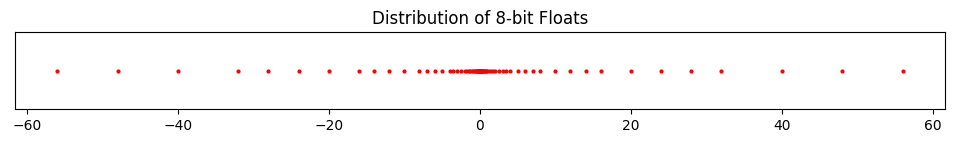

In [18]:
plot_number_dist(eight_bit_floats, title='Distribution of 8-bit Floats')

Notice how different this plot is from the ones for the signed integers. With the integers, the points were equally spaced. Now points close to $0$ are getting represented much closer together than points far from $0$. There are $74$ of the $120$ total points showing up just in the range $[-1,1]$. That's over half!. Meanwhile, only $22$ points total show up in the combined ranges of $[-60,-10]$ and $[10,60]$. Very strange.

Feel free to play around with different floating point systems by using different choices for `n`, `n_man`, `n_exp`, and `bias`. Be careful, however, not to make `n_exp` too large or you may crash the kernel...

### Double Precision

So how does python represent floats? Python by default uses what's called **double precision** to represent floats, also called **float64**. This means $n=64$ total bits of precision are used, with $n_e=11$, $n_m=52$, and bias $b=1023=2^{10}-1$. Double precision allows for a *much* larger range of numbers than 8-bit precision does: 
- The max value allowed is $2^{2^{n_e}-b} = 2^{1025} \approx 10^{308}$.
- The min value allowed is $-2^{2^{n_e}-b} = -2^{1025} \approx -10^{308}$.
- Numbers *outside* the range of about $[-10^{308}, 10^{308}]$ will *overflow*.
- The smallest values allowed are (plus or minus) $2^{-b+1} = 2^{-1022} \approx 10^{-308}$.
    - Using subordinal numbers, the smallest values are (plus or minus) $2^{-b-n_m+1} = 2^{-1074} \approx 10^{-324}$.
- Numbers *inside* the range of about $[-10^{-308}, 10^{-308}]$ will *underflow*.
    - Using subordinal numbers, this range is around $[-10^{-324}, 10^{-324}]$.
- The machine epsilon is $\varepsilon_m = 2^{-53} \approx 10^{-16}$.
- Numbers requiring more than about 15-16 digits of precision will get truncated, resulting in numerical roundoff.
- The special numbers $\pm \infty$, $\pm 0$, and $\text{NaN}$ are represented similarly as before, except using 64 bits.

To illustrate the point regarding numerical roundoff, here's what happens if we try to use double precision floating point to define the constant $\pi$ to its first [100 digits](https://www.wolframalpha.com/input?i=pi+to+100+digits)? Notice it just gets truncated to its first 15 digits. Double precision is unable to keep track of the other 85 digits. They just get lost to numerical roundoff.

In [19]:
pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
pi

3.141592653589793

Another thing to worry about is adding small numbers to medium to large sized numbers, e.g. $10 + 10^{-16}$, which will just get rounded down to $10.0$.

In [20]:
10.0 + 1e-16

10.0

Numerical roundoff is often an issue when subtracting two floats. Here's what happens when we try to subtract two numbers that should be equal, $x=0.1+0.2$ and $y=0.3$. Instead of $y-x=0$, we get $y-x \approx -5.55 \cdot 10^{-17}$. The problem comes from the calculation $x=0.1+0.2$, which caused a slight loss of precision in $x$.

In [21]:
x = 0.1 + 0.2
y = 0.3
y - x

-5.551115123125783e-17

A major implication of these calculations is that you should *never* test floating points for exact equality because numerical roundoff can mess it up. If you'd tried to test something like `(y - x) == 0.0`, you'd have gotten the wrong answer. Instead, you want to test that `y - x` is less than some small number `tol`, called a *tolerance*, i.e. `abs(y - x) < tol`.

In [22]:
y - x == 0.0

False

In [23]:
tol = 1e-5
abs(y - x) < tol

True

Numerical roundoff explains why we got the weird results above when subtracting $1.2 - 4.3$. The imperfect precision in the two numbers resulted in a numerical roundoff error, leading in the trailing $9$s that should've rounded up to $-3.1$ exactly. In general, subtracting floats is one of the most dangerous operations to do, as it tends to lead to the highest loss of precision in calculations. The closer two numbers are to being equal the worse this loss of precision tends to get.

I mentioned that double precision has a smallest number of $2^{-1022} \approx 10^{-308}$, but caveated that by saying that, by using a trick called **subordinal numbers**, we can get the smallest number down to about $10^{-324}$. What did I mean by this? It turns out that the bits where the biased exponent $e'=0$ (i.e. all exponent bits are zero) go mostly unused in the standard version of double precision. By using this zero exponent and allowing the mantissa $m$ to take on all its possible values, we can get about $2^{52}$ more values (since the mantissa has 52 bits). This lets us get all the way down to $2^{-1022} \cdot 2^{-52} = 2^{-1074} \approx 10^{-324}$.

Python (and numpy) by default implements double precision with subordinal numbers, as we can see.

In [24]:
2 ** (-1074)
2 ** (-1075)

5e-324

0.0

The special numbers $\pm \infty$, $\pm 0$, and $\text{NaN}$ are also defined in double precision. In python (and numpy) they're given by the following commands,
- $\infty$: `float('inf')` or `np.inf`, 
- $-\infty$: `float('-inf')` or `-np.inf`, 
- $\pm 0$: `0`,
- $\text{NaN}$: `float('nan')` or `np.nan`.

In [25]:
float('inf')
np.inf

inf

inf

In [26]:
float('-inf')
-np.inf

-inf

-inf

In [27]:
0
-0

0

0

In [28]:
float('nan')
np.nan

nan

nan

You may be curious what exactly $\text{NaN}$ ("not a number") is and where it might show up. Basically, NaNs are used wherever values are undefined. Anytime an operation doesn't return a sensible value it risks getting converted to NaN. One example is the operation $\infty - \infty = \infty + (-\infty)$, which mathematically doesn't make sense. No, it's not zero...

In [29]:
float('inf') + float('-inf')
np.inf - np.inf

nan

nan

I'll finish this section by mentioning that there are two other floating point representations worth being aware of: **single precision** (or **float32**), and **half precision** (or **float16**). Single precision uses 32 bits to represent a floating point number. Half precision uses 16 bits. It may seem strange to even bother having these less-precise precisions lying around, but they do have their uses. For example, half precision shows up in deep learning as a more efficient way to represent the weights of a neural network. Since half precision floats only take up 25% as many bits as default double precision floats do, using them can yield a 4x reduction in model memory sizes. We'll see more on this later.

### Common Floating Point Pitfalls

To cap this long section on floats, here's a list of common pitfalls people run into when working with floating point numbers, and some ways to avoid each one. This is probably the most important thing to take away from this section. You may find it helpful to reference later on. See this [post](https://www.codeproject.com/Articles/29637/Five-Tips-for-Floating-Point-Programming) for more information.

1. Numerical overflow: Letting a number blow up to infinity (or negative infinity)
    - Clip numbers from above to keep them from being too large
    - Work with the log of the number instead
    - Make sure you're not dividing by zero or a really small number
    - Normalize numbers so they're all on the same scale
2. Numerical underflow: Letting a number spiral down to zero
    - Clip numbers from below to keep them from being too small
    - Work with the exp of the number instead
    - Normalize numbers so they're all on the same scale
3. Subtracting floats: Avoid subtracting two numbers that are approximately equal
    - Reorder operations so approximately equal numbers aren't nearby to each other
    - Use some algebraic manipulation to recast the problem into a different form
    - Avoid differencing squares (e.g. when calculating the standard deviation)
4. Testing for equality: Trying to test exact equality of two floats
    - Instead of testing `x == y`, test for approximate equality with something like `abs(x - y) <= tol`
    - Use functions like `np.allclose(x, y)`, which will do this for you
5. Unstable functions: Defining some functions in the naive way instead of in a stable way
    - Examples: factorials, softmax, logsumexp
    - Use a more stable library implementation of these functions
    - Look for the same function but in log form, e.g. `log_factorial` or `log_softmax`
6. Beware of NaNs: Once a number becomes NaN it'll always be a NaN from then on
    - Prevent underflow and overflow
    - Remove missing values or replace them with finite values